# Dataset Description

- This is a countrywide car accident dataset, which covers 49 states of the USA. The accident data are collected from February 2016 to Dec 2020, using multiple APIs that provide streaming traffic incident (or event) data. These APIs broadcast traffic data captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks. Currently, there are about **1.5 million** accident records in this dataset.

# Acknowledgements

- Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. “A Countrywide Traffic Accident Dataset.”, 2019.

- Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. "Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights." In proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019.



# Questions

- Which city in US has reported the most number of accident cases?

- Which 5 states reported the highest number of accident cases?

- Which street is most accident prone in US?

- What time of the day are accidents most frequent in?

- Which days of the week have the most accidents?

- What is the trend of accidents year over year (decreasing/increasing?)

- On which side of the road most of the accidents occured?

- How did the weather conditions affected the cases?






# Loading Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [ ]:
# Loading dataframe into google colab

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Kaggle_dataset/US_Accidents_Dec20_updated.csv')

In [ ]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,NaN,US-50 E,R,Cincinnati,Hamilton,OH,45202,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day


# Early Insights

1. Looking into the data.
2. Finding out key inferences from the data.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

INSIGHTS:-

- Dataframe.info() shows that this dataframe has datatype of bool(13), float64(13), int64(1)and object(20).

- This also shows that there are quite a few null values present in this dataframe.

In [ ]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,4.699690e+05,1.473031e+06,1.066748e+06,1.470555e+06,1.479790e+06,1.471853e+06,1.387202e+06,1.005515e+06
mean,2.238630e+00,3.690056e+01,-9.859919e+01,3.690061e+01,-9.859901e+01,5.872617e-01,8.907533e+03,5.958460e+01,5.510976e+01,6.465960e+01,2.955495e+01,9.131755e+00,7.630812e+00,8.477855e-03
std,6.081481e-01,5.165653e+00,1.849602e+01,5.165629e+00,1.849590e+01,1.632659e+00,2.242190e+04,1.827316e+01,2.112735e+01,2.325986e+01,1.016756e+00,2.889112e+00,5.637364e+00,1.293168e-01
min,1.000000e+00,2.457022e+01,-1.244976e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.385422e+01,-1.182076e+02,3.385420e+01,-1.182077e+02,0.000000e+00,1.212000e+03,4.700000e+01,4.080000e+01,4.800000e+01,2.944000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.735113e+01,-9.438100e+01,3.735134e+01,-9.437987e+01,1.780000e-01,4.000000e+03,6.100000e+01,5.700000e+01,6.800000e+01,2.988000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.072593e+01,-8.087469e+01,4.072593e+01,-8.087449e+01,5.940000e-01,1.010000e+04,7.300000e+01,7.100000e+01,8.400000e+01,3.004000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.706000e+02,1.130000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


INSIGHTS:-

- In about 75% of the accidents precipitation(in) is 0.0. Thus precipitation might nit be the main cause of these accidents.
- In about 75% of the accidents Visibility(mi) is 10.0 and the mean visibility is about 9.0 thus low visibility might not be the issue during the accidents.
- About 75% of the accidents have a Severity of 2.
- Average distance of accidents is about 0.59 miles, which is quite large enought to justify that, those vehicles involved in the accidents were at quite high speed.

# Data cleaning and Preprocessing

1. Finding out the amount of missing data.
2. Deleting or adjusting the missing data.

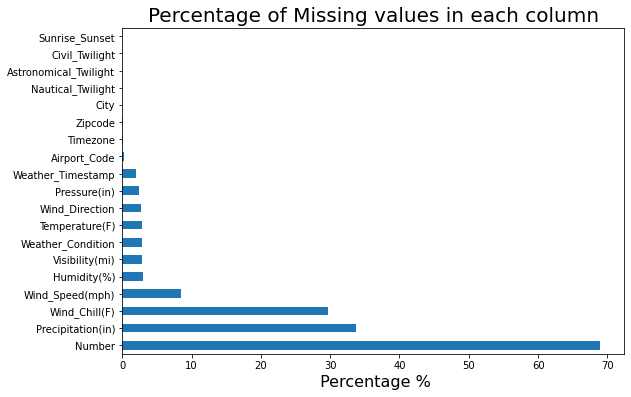

In [ ]:
missing_perct = (df.isna().sum().sort_values(ascending = False))/ len(df) * 100
missing_percentage = missing_perct[missing_perct != 0]

plt.figure(figsize=(9,6))
plt.title('Percentage of Missing values in each column', Size = 20, color = 'black')
plt.xlabel(" Percentage %", size= 16)
missing_percentage.plot(kind = 'barh')

plt.show()

- The numbers column has a very high percentage of null values thus this column should be dropped from the dataframe.

In [ ]:
df = df.drop(columns ='Number')

In [ ]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'Side',
       'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

# Exploratory Data Analysis

## *Top 15 cities by accidents.*



In [ ]:
# df.groupby(['City']).count().sort_values('ID', ascending= False).iloc[ : , 0:1]

accidents_by_cities = df.City.value_counts()
accidents_by_cities[:15]

Los Angeles    39984
Miami          36233
Charlotte      22203
Houston        20843
Dallas         19497
Sacramento     18431
Orlando        16169
Portland       14805
San Diego      14090
Minneapolis    12653
Atlanta        11854
Chicago        11507
Saint Paul     10084
Phoenix         9934
Raleigh         9516
Name: City, dtype: int64

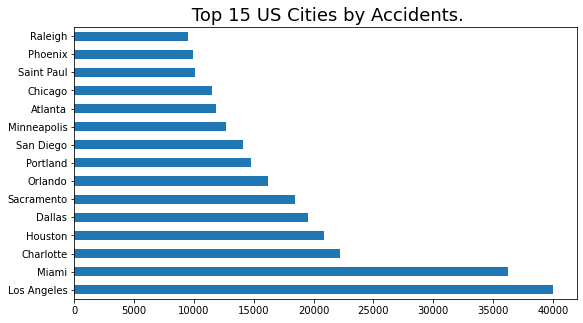

In [ ]:
plt.figure(figsize=(9,5))
plt.title(" Top 15 US Cities by Accidents.", size= 18)
accidents_by_cities[:15].plot(kind = 'barh')
plt.show()

- Note: New York isn't even in the top 15 cities with highest number of Accidents. Despite Having a large population.

In [ ]:
df.State.unique()

array(['OH', 'IN', 'KY', 'WV', 'MI', 'PA', 'CA', 'NV', 'MN', 'TX', 'MO',
       'CO', 'OK', 'LA', 'KS', 'WI', 'IA', 'MS', 'NE', 'ND', 'WY', 'SD',
       'MT', 'NM', 'AR', 'IL', 'NJ', 'GA', 'FL', 'NY', 'CT', 'RI', 'SC',
       'NC', 'MD', 'MA', 'TN', 'VA', 'DE', 'DC', 'ME', 'AL', 'NH', 'VT',
       'AZ', 'UT', 'ID', 'OR', 'WA'], dtype=object)

## TOP 5 States By Accidents

In [ ]:
accidents_by_states = df.State.value_counts()
accidents_by_states[:5]

CA    448833
FL    153007
OR     87484
TX     75142
NY     60974
Name: State, dtype: int64

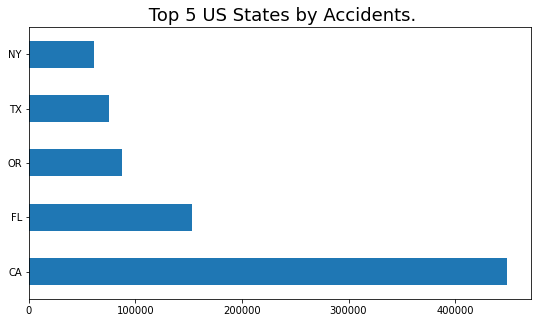

In [ ]:
plt.figure(figsize=(9,5))
plt.title(" Top 5 US States by Accidents.", size= 18)
accidents_by_states[:5].plot(kind = 'barh')
plt.show()

## Which street is most accident prone in US?

In [ ]:
accidents_by_street = df.Street.value_counts()
accidents_by_street[:10]

I-5 N      26645
I-95 N     22407
I-95 S     19406
I-5 S      18432
I-10 E     14681
I-10 W     14305
I-80 W     10996
I-80 E     10465
I-94 W      9199
I-405 N     9026
Name: Street, dtype: int64

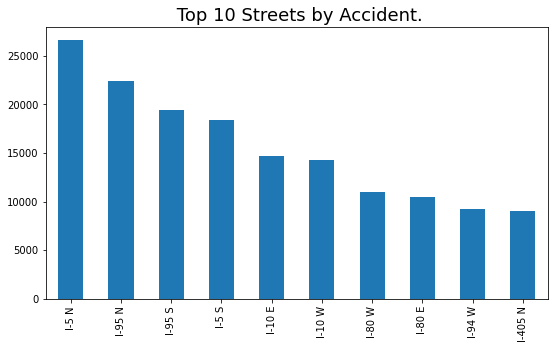

In [ ]:
plt.figure(figsize=(9,5))
plt.title(" Top 10 Streets by Accident.", size= 18)
accidents_by_street[:10].plot(kind = 'bar')
plt.show()

## What time of the day are accidents most frequent in?

In [ ]:
df.Start_Time.dtype

dtype('O')

In [ ]:
# We will change the Start_Time column into a Timestamp dtype.
df.Start_Time = pd.to_datetime(df.Start_Time)
df.Start_Time.dtype

dtype('<M8[ns]')

In [ ]:
hours = df['Start_Time'].dt.hour

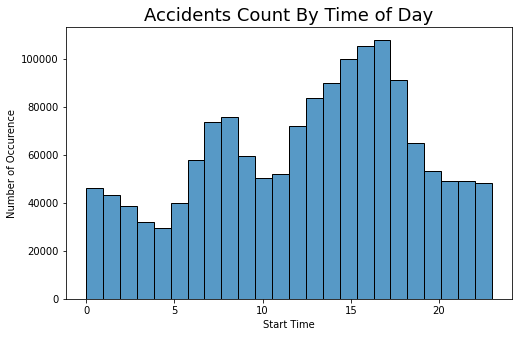

In [ ]:
# Plot the distribution of occurence by time of the day.

fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(hours, bins= 24)

plt.xlabel("Start Time")
plt.ylabel("Number of Occurence")
plt.title('Accidents Count By Time of Day', size = 18)

plt.show()

- This Plot shows that most of the accidents happen between 3pm - 6pm.
- Between 7am - 9am duration, 2nd most number of accidents occur.
- This might have happend due to the office hours. We can say this with certainty by taking a look at the number of accidents during working and weekends.
- High no of accidents occur in the morning possibly because people are in a hurry to reach their destination. 

## Which days of the week have the most accidents?

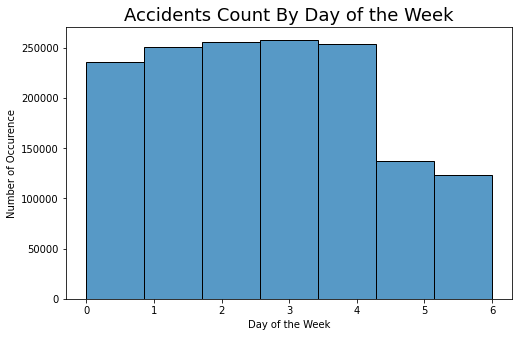

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(df.Start_Time.dt.dayofweek, bins= 7)

plt.xlabel("Day of the Week")
plt.ylabel("Number of Occurence")
plt.title('Accidents Count By Day of the Week', size = 18)

plt.show()

- This shows that weekdays have highest number of Accidents, may be because of higher number of vehicles on the road.
- Weekends have a lower number of Accidents as compared to weekdays.
- We will analyse further, the time of the day of accidents during weekends.

## The time of the day of accidents during weekends.

In [ ]:
# Saturday and Sundays!
saturday = df[df.Start_Time.dt.dayofweek == 5]
sunday = df[df.Start_Time.dt.dayofweek == 6]

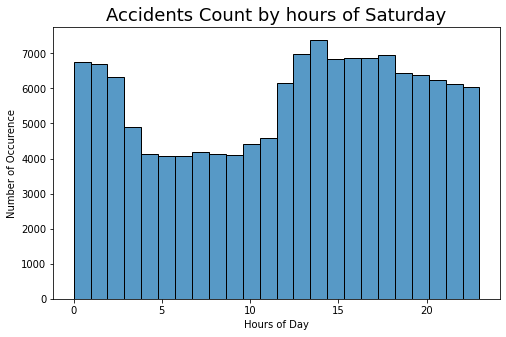

In [ ]:
# Accidents on Saturday

fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(saturday.Start_Time.dt.hour, bins= 24)

plt.xlabel("Hours of Day")
plt.ylabel("Number of Occurence")
plt.title('Accidents Count by hours of Saturday', size = 18)

plt.show()

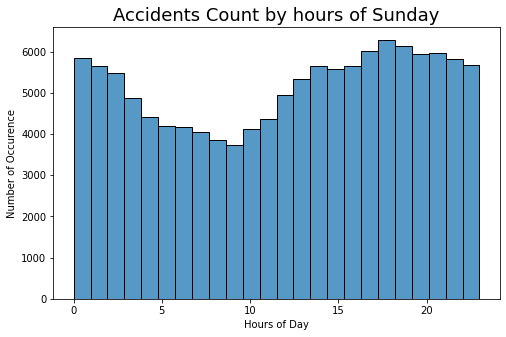

In [ ]:
# Sundays

fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(sunday.Start_Time.dt.hour, bins= 24)

plt.xlabel("Hours of Day")
plt.ylabel("Number of Occurence")
plt.title('Accidents Count by hours of Sunday', size = 18)

plt.show()

- Weekends have a different trend than weekdays. 
- Peak hours are 5pm - 2am, i.e during the night hours. This might be due to the fact that its a weekend and most peoples are out during the night hours.

## What is the trend of accidents year over year (decreasing/increasing?)

In [ ]:
year = pd.DataFrame(df.Start_Time.dt.year.value_counts()).reset_index().rename(columns={"index":"Year","Start_Time":"Accident_Cases"})

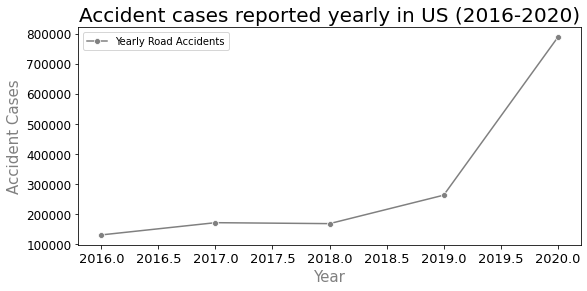

In [ ]:
plt.figure(figsize=(9,4))
plt.title('Accident cases reported yearly in US (2016-2020)', size=20, color='black')
plt.xlabel('Year', fontsize=15, color='grey')
plt.ylabel('Accident Cases', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
a = sns.lineplot(data = year, marker='o', x='Year', y='Accident_Cases', color = 'grey', label="Yearly Road Accidents")
#a.xaxis.set_ticks(year.Year)
#a.yaxis.set_major_formatter(ticker.EngFormatter())

plt.show()

In [ ]:
# Lets calculate the percentage of accidents occured in each year.

year['Percentage'] = year.Accident_Cases / year.Accident_Cases.sum() * 100

In [ ]:
year

,Year,Accident_Cases,Percentage
0,2020,787932,51.972212
1,2019,261772,17.266553
2,2017,170099,11.219777
3,2018,166936,11.011145
4,2016,129325,8.530313


- We see that the trend is almost exponentially increasing year by year with a sharp rise in year 2020.
- 2020 has almost about 51% of the total cases. Thus it proves the fact that the cases are actually increasing year by year at an exponential rate.

## On which side of the road most of the accidents occured?

In [ ]:
accidents_by_side = pd.DataFrame(df.Side.value_counts()).reset_index().rename(columns={'index':'Side','Side':'count'})
accidents_by_side

,Side,count
0,R,1294562
1,L,221502


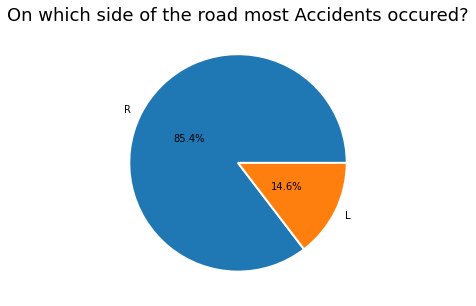

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(x=accidents_by_side['count'], autopct="%.1f%%", labels=accidents_by_side['Side'], pctdistance=0.5,  wedgeprops = {"edgecolor" : "w",
                      'linewidth': 2,
                      'antialiased': True})
plt.title("On which side of the road most Accidents occured?", size = 18)
plt.show()

- Most of the accidents did occur on the right side of the road. This is probably because in US, they drive on the Right side of the road.

## What was the weather condition during the accidents?

In [ ]:
weather = df.Weather_Condition.value_counts()
weather[:20]

Fair                     465252
Mostly Cloudy            193595
Clear                    180223
Cloudy                   161291
Partly Cloudy            133102
Overcast                  87853
Light Rain                72511
Scattered Clouds          47061
Light Snow                22113
Fog                       19777
Haze                      17706
Rain                      17389
Fair / Windy               6631
Heavy Rain                 6119
Light Drizzle              4307
Mostly Cloudy / Windy      3612
Smoke                      3608
Cloudy / Windy             3300
Snow                       2730
Partly Cloudy / Windy      2125
Name: Weather_Condition, dtype: int64

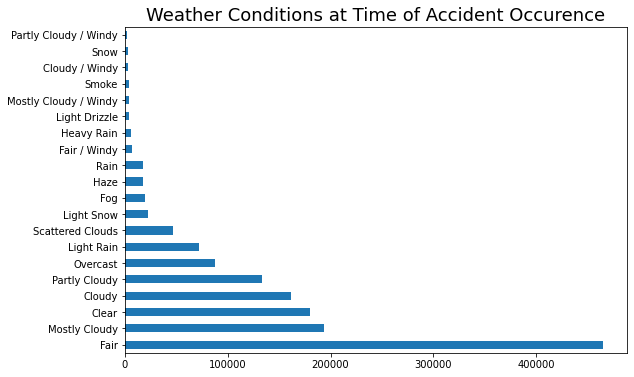

In [ ]:
# Let's visualize top 20 weather conditions at the time of accident occurence

plt.figure(figsize=(9,6))
plt.title("Weather Conditions at Time of Accident Occurence", size= 18)
weather[:20].plot(kind = 'barh')
plt.show()

- We cannot find out any evidence that weather conditions affect the occurance of Accidents using this dataset.

## Let's visualise the US accident map.

In [ ]:
sample_df = df.sample(int(0.1 * len(df)))

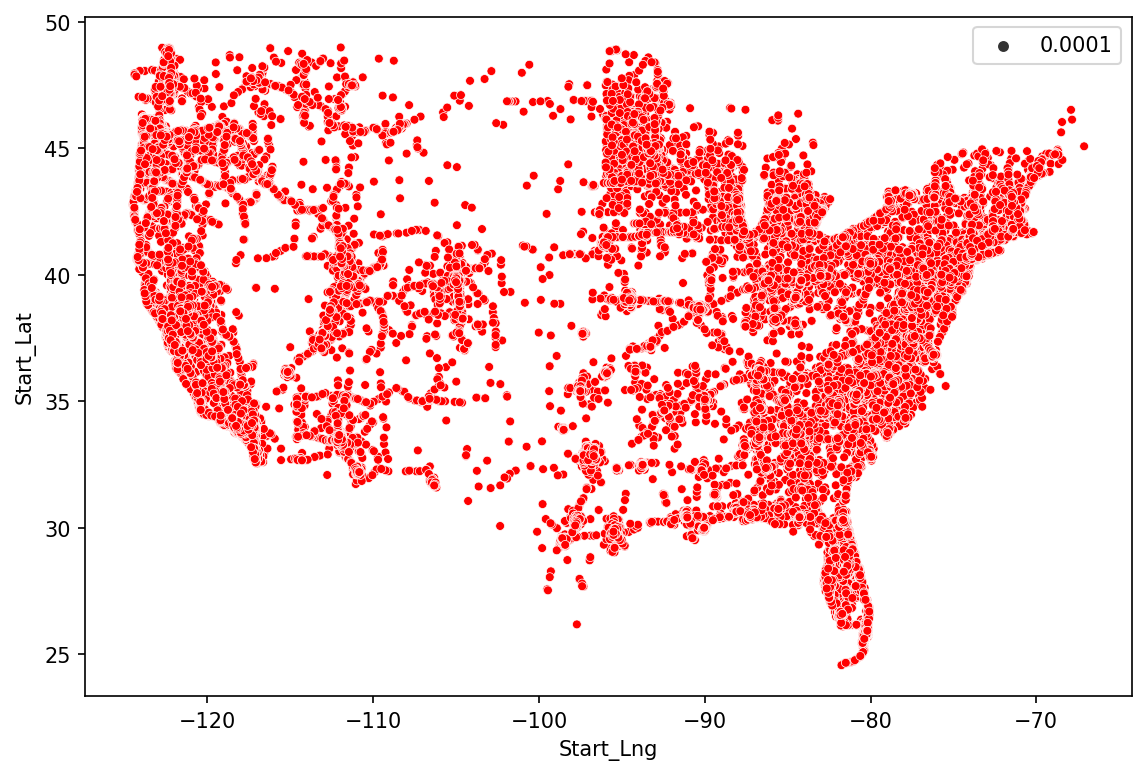

In [ ]:
plt.figure(figsize=(9,6), dpi=150)

sns.scatterplot(x=sample_df.Start_Lng, y=sample_df.Start_Lat, size=0.0001, color='red')
plt.show()

# Findings

- In about 75% of the accidents precipitation(in) is 0.0. Thus precipitation might nit be the main cause of these accidents.

- In about 75% of the accidents Visibility(mi) is 10.0 and the mean visibility is about 9.0 thus low visibility might not be the issue during the accidents.

- About 75% of the accidents have a Severity of 2.

- Average distance of accidents is about 0.59 miles, which is quite large enought to justify that, those vehicles involved in the accidents were at quite high speed.

- New York isn't even in the top 15 cities with highest number of Accidents. Despite Having a large population.

- Accidents more likely to happen in peak hours (Morning & evening). This could be explained by having more people on the road heading to work or business activities.

- Week days (work days) recorded more accidents than weekends.

- We see that the trend is almost exponentially increasing year by year with a sharp rise in year 2020.

- Accidents happened more frequently on the right side of the road.

- Surprisingly, most accidents happened when the weather was 'fair'. Perhaps weather (bad weather) was not a big contributing factor to accidents.

- Los Angeles was the city with the highest number of accidents.